# Dataton - Aiffel
* 대구 캠퍼스
* EagleAI
* 영화관 입장권 통합 전산망
* 김용훈, 최지원, Daniel

## 목차

1. 사용할 라이브러리 및 데이터 불러오기
2. 데이터 EDA 및 Preprocessing
3. 여러 지표에 따른 시각화

## 1. 사용할 라이브러리 및 데이터 불러오기

* matplotlib에 한글을 출력하기 위한 커맨드 라인 입니다.
* 'rc' 함수를 써러 한글 폰트를 맞춥니다. (나눔 고딕)

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

* 데이터를 불러옵니다.(1971 ~ 2022)
* 데이터의 형태와 head를 출력합니다.

In [354]:
data = pd.read_csv('KOBIS.csv')
print(data.shape)
data.head()

dfi.export(data.head(), 'graph/kyh_d_1_head.png')

(26197, 18)


[0728/210605.779309:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210607.417850:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210607.490264:INFO:headless_shell.cc(660)] Written to file /tmp/tmppleu8tnu/temp.png.
[0728/210607.615233:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210607.642348:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210607.817725:INFO:headless_shell.cc(660)] Written to file /tmp/tmpiu4gado0/temp.png.
[0728/210607.981908:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210607.995918:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210608.229899:INFO:headless_shell.cc(660)] Written to file /tmp/tmp_mf_tunu/temp.png.


## 2. 데이터 EDA 및 Preprocessing

중점적으로 볼 columns입니다.
* Movie_Name : 영화 이름
* Relase_Date : 개봉 일자
* Nationality : 국적
* National_Sales : 전국 매출액
* National_Audience : 전국 관객수
* Rating : 등급

In [355]:
col_use = ['Movie_Name', 'Release_Date', 'Nationality', 'National_Sales', 'National_Audience', 'Rating']
dfi.export(data[col_use].head(), 'graph/kyh_d_2_colum_used.png')
data[col_use].head()

[0728/210608.509485:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210608.524288:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210608.655390:INFO:headless_shell.cc(660)] Written to file /tmp/tmp23jrz7mk/temp.png.


,Movie_Name,Release_Date,Nationality,National_Sales,National_Audience,Rating
0,명량,2014-07-30,한국,"135,748,398,910","17,613,682",15세이상관람가
1,아바타,2009-12-17,미국,"128,447,097,523","13,624,328",12세이상관람가
2,왕의 남자,2005-12-29,한국,0,"12,302,831",15세이상관람가
3,극한직업,2019-01-23,한국,"139,647,979,516","16,264,944",15세이상관람가
4,어벤져스: 엔드게임,2019-04-24,미국,"122,182,694,160","13,934,592",12세이상관람가


(26197, 18)
(18,)
(6,)


/tmp/ipykernel_8632/3995842286.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_show.index, fontsize= 5)


<AxesSubplot:>

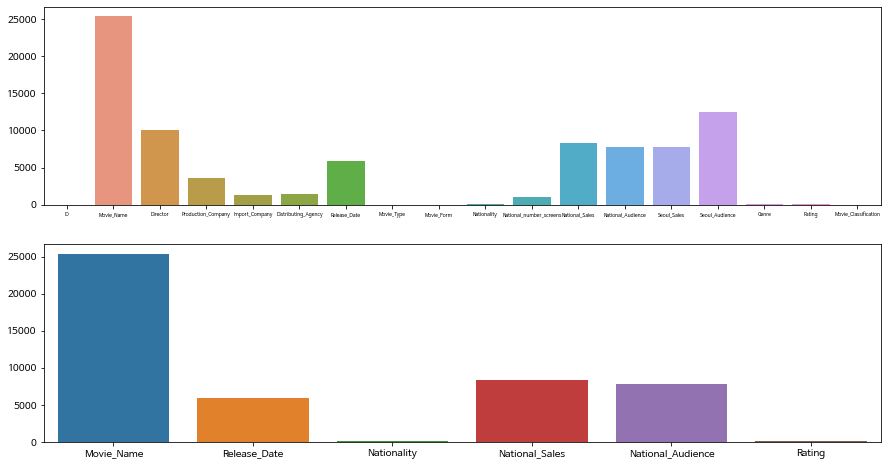

In [356]:
data_show = data.describe(include='all').loc['unique']
data_show_use = data.describe(include='all').loc['unique', col_use]
print(data.shape)
print(data_show.shape)
print(data_show_use.shape)

fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 8))
ax1.set_xticklabels(data_show.index, fontsize= 5)
sns.barplot(x = data_show.index , y = data_show.values, ax = ax1)
sns.barplot(x = data_show_use.index , y = data_show_use.values, ax = ax2)


* n개의 NULL 값을 가지는 행의 개수입니다.

NULL 값을 가지는 행의 개수 : 25179
NULL 값을 5개 이상 가지는 행의 개수: 238


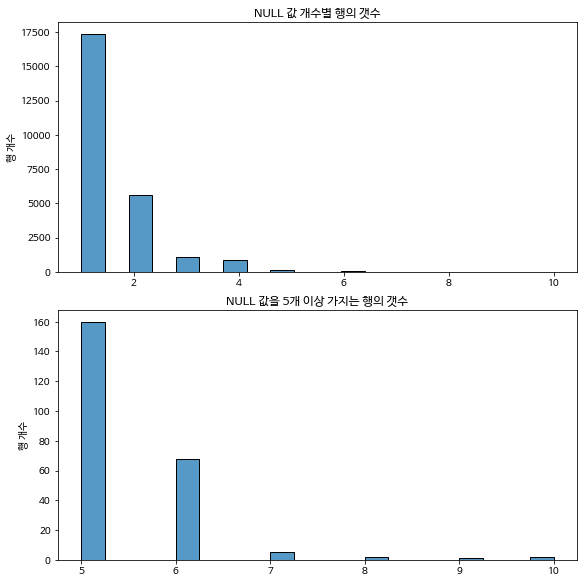

In [357]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 0 ]
print("NULL 값을 가지는 행의 개수 :", len(data_null))
data_null2 = data_null[data_null.values > 4]
print("NULL 값을 5개 이상 가지는 행의 개수:", len(data_null2))

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize = (8,8))
ax[0].set_title("NULL 값 개수별 행의 갯수")
sns.histplot(x=data_null.values, ax = ax[0], bins=20)
ax[0].set_ylabel('행 개수')
ax[1].set_title("NULL 값을 5개 이상 가지는 행의 갯수")
sns.histplot(x=data_null2.values, ax = ax[1], bins=20)
ax[1].set_ylabel('행 개수')

plt.show()

* n개의 NULL 값을 가지는 열의 개수입니다.

In [358]:
data_null = data.isnull().any()
data_null = data_null[data_null.values == True]
data_null_col = data_null.index
data_null_col

Index(['Director', 'Production_Company', 'Import_Company',
       'Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality',
       'National_Sales', 'Seoul_Sales', 'Genre', 'Rating'],
      dtype='object')

* Visualization how many columns have null values

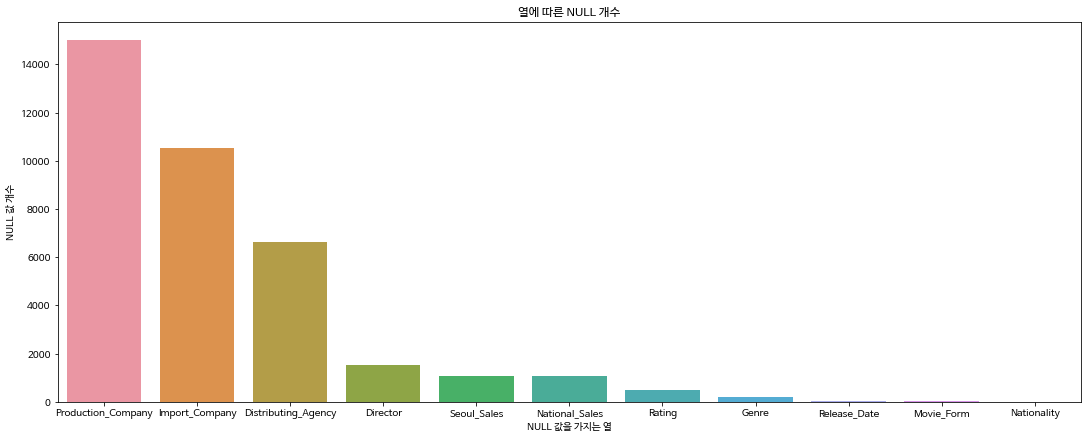

In [359]:
data_null = data.isnull().sum(axis = 0)
data_null = data_null[data_null_col]
data_null.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(constrained_layout=True, figsize = (15,6))
sns.barplot(x=data_null.index, y=data_null.values)
ax.set_title("열에 따른 NULL 개수")
ax.set_xlabel("NULL 값을 가지는 열")
ax.set_ylabel("NULL 값 개수")

plt.show()

1. 열의 데이터 타입별로 나눕니다.(후에 변해야할)
   - 숫자이고 NULL 값 없음 :  
      1. 'ID'  
      2. 'National_number_screens'    
      3. 'National_Audience'  
      4. 'Seoul_Audience'  
   - 숫자이고 NULL 값 있음 :  
      1. 'National_Sales'  
      2. 'Seoul_Sales'  
   - datetime 형태로 바꾸고 year, month, day로 나눔 :  
      * Release_date  
   - 문자열이고 NULL 값 있음 :  
      1. 'Director'  
      2. 'Production_Company'  
      3. 'Import_Company'  
      4. 'Distributing_Agency'  
      5. 'Moive_Form'  
      6. 'Nationality'  
      7. 'Genre'  
      8. 'Rating'
    - 문자열이고 NULL 값 없음 :  
      1. 'Movie_Name'
      2. 'Movie_Type'
      3. 'Movie_Classification'

* NULL 값을 5개 이상 가지는 행을 삭제합니다.(238)

In [360]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 4]
print('Count :', len(data_null))
data = data.drop(data_null.index)

Count : 238


NULL 값을 가지는 숫자 열에 NULL 값을 0으로 채우고  
type을 int로 바꿉니다.

In [361]:
num_columns_null = ['National_Sales','Seoul_Sales']
data[num_columns_null] = data[num_columns_null].fillna('0')
data[num_columns_null].isna().sum()

num_columns = ['National_number_screens', 'National_Audience', 'National_Sales', 'Seoul_Audience','Seoul_Sales']
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('int')

'Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Movie_Form', 'Genre'  NULL 값에 No_열이름으로 채웁니다.

In [362]:
string_columns1 = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Movie_Form', 'Genre']
print(data[string_columns1].isnull().sum())
for i in string_columns1:
    data[i] = data[i].fillna('No_'+ i)

print(data[string_columns1].isnull().sum())

Director                1475
Production_Company     14936
Import_Company         10344
Distributing_Agency     6415
Movie_Form                 5
Genre                     91
dtype: int64
Director               0
Production_Company     0
Import_Company         0
Distributing_Agency    0
Movie_Form             0
Genre                  0
dtype: int64


Nationality 열의 NULL 값을 직접 찾아서 채웁니다.

In [363]:
dfi.export(data[data['Nationality'].isnull()], 'graph/kyh_d_3_Nationality_null_before.png')
data[data['Nationality'].isnull()]

[0728/210610.317500:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210610.331004:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210610.471694:INFO:headless_shell.cc(660)] Written to file /tmp/tmp74zndi35/temp.png.
[0728/210610.608470:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210610.621825:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210610.781608:INFO:headless_shell.cc(660)] Written to file /tmp/tmplexl7v56/temp.png.
[0728/210610.934804:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210610.948500:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210611.153920:INFO:headless_shell.cc(660)] Written to file /tmp/tmpwwi0qjb8/temp.png.


,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
3805,3806,필사의 탈출,러스 메이버리,No_Production_Company,연방영화(주),No_Distributing_Agency,1976-03-20,개봉영화,장편,NaN,0,0,0,0,63727,드라마,NaN,일반영화
6802,6803,신촉산,서극,No_Production_Company,(주)건화상사,No_Distributing_Agency,1983-04-23,개봉영화,단편,NaN,0,0,0,0,16422,액션,NaN,일반영화


* 필사의 탈출 : 미국  
* 신촉산 : 홍콩   
열 안에 해당값들이 이미 있는지 확인합니다.

In [364]:
Nationality_columns = ['미국','홍콩']
for i in Nationality_columns:
    print(i in set(data['Nationality']))

True
True


모든 값이 이미 열에 있으니 각각의 행에 추가합니다.

In [365]:
data.loc[3805 , 'Nationality' ] = '미국'
data.loc[6802 , 'Nationality' ] = '홍콩'
dfi.export(data.loc[[3805, 6802]], 'graph/kyh_d_4_Nationality_null_after.png')
data.loc[[3805, 6802]]

[0728/210611.529034:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210611.543034:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210611.670116:INFO:headless_shell.cc(660)] Written to file /tmp/tmpijhlgkze/temp.png.
[0728/210611.799815:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210611.813716:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210611.979914:INFO:headless_shell.cc(660)] Written to file /tmp/tmpyis_rqsz/temp.png.
[0728/210612.137061:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210612.150940:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210612.369367:INFO:headless_shell.cc(660)] Written to file /tmp/tmpssomvgls/temp.png.


,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
3805,3806,필사의 탈출,러스 메이버리,No_Production_Company,연방영화(주),No_Distributing_Agency,1976-03-20,개봉영화,장편,미국,0,0,0,0,63727,드라마,NaN,일반영화
6802,6803,신촉산,서극,No_Production_Company,(주)건화상사,No_Distributing_Agency,1983-04-23,개봉영화,단편,홍콩,0,0,0,0,16422,액션,NaN,일반영화


Rating 열에 있는 NULL값을 제거하기 위해  
분류가 되어있는 새로운 csv 파일을 만듭니다.

In [366]:
df_Rating = pd.read_csv('Rating.csv')
print(df_Rating.shape)
print(set(df_Rating['score']))

dfi.export(data[['Rating']].head(), 'graph/kyh_d_5_Rating_before.png')
dfi.export(df_Rating.head(), 'graph/kyh_d_6_Rating_newCSV.png')
df_Rating.head()

(55, 2)
{'ETC', 'X', '18', 'ALL', '12', '15'}


[0728/210612.626581:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210612.634001:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210612.776050:INFO:headless_shell.cc(660)] Written to file /tmp/tmpfmrfluj9/temp.png.
[0728/210612.923131:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210612.938081:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210613.068221:INFO:headless_shell.cc(660)] Written to file /tmp/tmpyxgy2ibf/temp.png.


,Rating,score
0,12세 미만인 자는 관람할 수 없는 등급,12
1,12세관람가,12
2,12세이상관람가,12
3,"12세이상관람가,12세관람가",12
4,"12세이상관람가,15세 미만인 자는 관람할 수 없는 등급",15


'Rating' 열의 값을 새로운 csv 파일과 연계하여 바꿉니다.  
NULL 값은 'ETC'로 바꿉니다.

In [367]:
for i in range(len(df_Rating)):
    data.replace(df_Rating['Rating'][i], df_Rating['score'][i], inplace = True)
    # print(df_Rating['Rating'][i], df_Rating['score'][i])

# data['Rating']
data['Rating'].fillna('ETC', inplace = True)

set(data['Rating'])

dfi.export(data[['Rating']].head(), 'graph/kyh_d_7_Rating_after.png')

data[['Rating']].head()

[0728/210613.920353:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210613.929600:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210614.054570:INFO:headless_shell.cc(660)] Written to file /tmp/tmpspogzwe7/temp.png.


,Rating
0,15
1,12
2,15
3,15
4,12


'Release Date' 열을 datatime 형태로 변환하고  
year, month, day를 뽑아냅니다.

In [368]:
import datetime

data['Release_Date'] = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")

data['Release_Date'].dt.year
data['year'] = data['Release_Date'].dt.year

data['Release_Date'].dt.month
data['month'] = data['Release_Date'].dt.month

data['Release_Date'].dt.day
data['day'] = data['Release_Date'].dt.day

data['year'] = data['year'].fillna(0)
data['year'].isna().sum()

data['month'] = data['month'].fillna(0)
data['month'].isna().sum()

data['day'] = data['day'].fillna(0)
data['day'].isna().sum()

dfi.export(data[['Release_Date','year','month','day']].head(), 'graph/kyh_d_8_dattime.png')
data[['Release_Date','year','month','day']].head()

[0728/210614.281684:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210614.298465:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210614.423561:INFO:headless_shell.cc(660)] Written to file /tmp/tmpf1dnzepl/temp.png.


,Release_Date,year,month,day
0,2014-07-30,2014.0,7.0,30.0
1,2009-12-17,2009.0,12.0,17.0
2,2005-12-29,2005.0,12.0,29.0
3,2019-01-23,2019.0,1.0,23.0
4,2019-04-24,2019.0,4.0,24.0


Release_Date는 이미 분리 했으므로 Data에서 삭제하겠습니다.  
이제 NULL 값이 열마다 몇개 있는지  출력해봅시다.

/home/aiffel/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


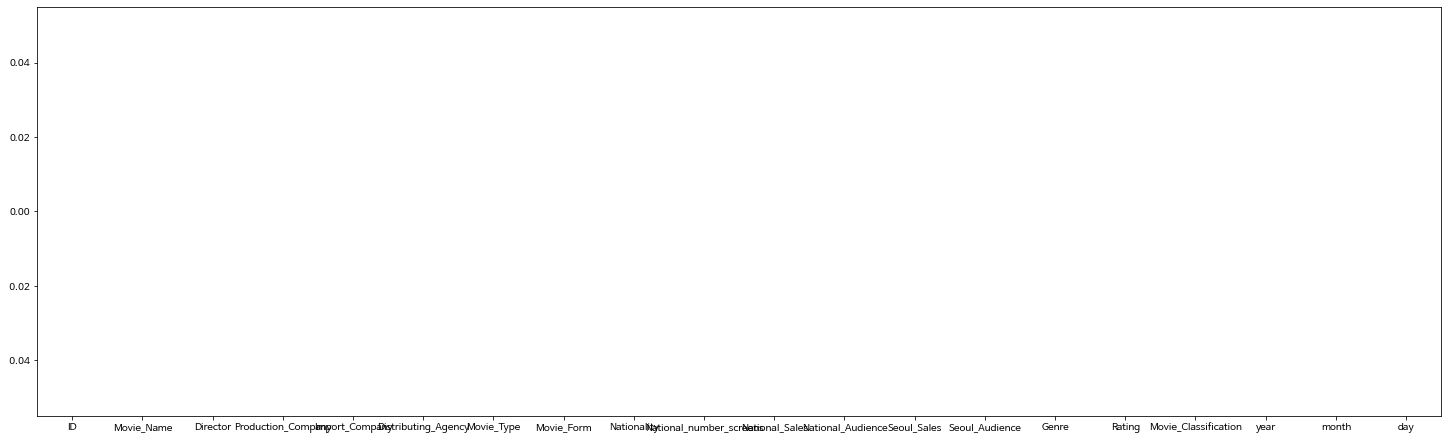

ID                         0
Movie_Name                 0
Director                   0
Production_Company         0
Import_Company             0
Distributing_Agency        0
Movie_Type                 0
Movie_Form                 0
Nationality                0
National_number_screens    0
National_Sales             0
National_Audience          0
Seoul_Sales                0
Seoul_Audience             0
Genre                      0
Rating                     0
Movie_Classification       0
year                       0
month                      0
day                        0
dtype: int64

In [369]:
data.drop('Release_Date', axis = 1, inplace = True)
data_null = data.isnull().sum(axis = 0)

fig, ax = plt.subplots(constrained_layout=True, figsize = (20,6))
sns.barplot(x=data_null.index, y=data_null.values)
plt.show()

data_null

이제 저희 데이터에는 결측값이 없습니다.  
이제 저희가 자주 사용할 열의 이상치가 있는지 확인해 봅시다.
c자주 사용하는 열은
['Movie_Name', 'Release_Date', 'Nationality', 'National_Sales', 'National_Audience', 'Rating']


숫자 열들의 이상치로 보이는 0인 경우를 봅시다.

In [370]:
# col_use = ['Movie_Name', 'Release_Date', 'Nationality', 'National_Sales', 'National_Audience', 'Rating']

from collections import Counter

num_columns = ['National_Audience', 'National_Sales', 'Seoul_Audience','Seoul_Sales']

print(data.shape)

test = []
columns_0_count  = pd.DataFrame()
columns_0_count['column_name'] = num_columns

print("0 values")
for i in num_columns:
    print(i, ':' ,Counter(data[i])[0])
    test.append(Counter(data[i])[0])
    
columns_0_count['count'] = test

(25959, 20)
0 values
National_Audience : 7149
National_Sales : 8689
Seoul_Audience : 6644
Seoul_Sales : 15221


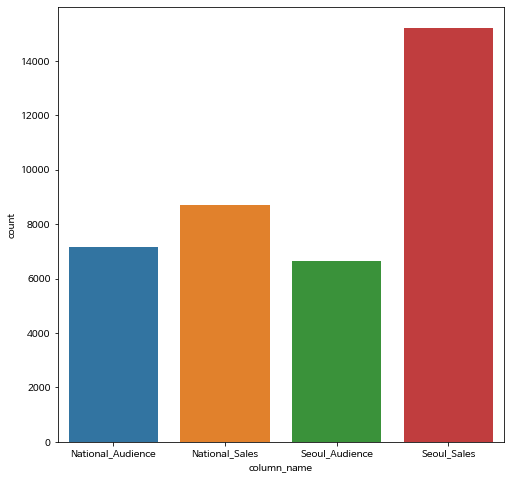

,column_name,count
0,National_Audience,7149
1,National_Sales,8689
2,Seoul_Audience,6644
3,Seoul_Sales,15221


In [371]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=columns_0_count['column_name'], y=columns_0_count['count'])
plt.show()
columns_0_count

해당 열의 0 값이 2가지 의미를 가지고 있습니다.  
실제로 0인지와 통계를 받지못해서 0인 경우가 있습니다.  
해당 기준의 부재로 0을 다른 값으로 채우는 것은 힘들 것 같습니다.

In [372]:
dfi.export(data.iloc[[2,19635]], 'graph/kyh_d_9_problem_0.png')
data.iloc[[2,19635]]

[0728/210615.057084:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210615.070536:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210615.219393:INFO:headless_shell.cc(660)] Written to file /tmp/tmp2xy6c_2a/temp.png.
[0728/210615.375783:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210615.390955:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210615.561122:INFO:headless_shell.cc(660)] Written to file /tmp/tmpxbwtpgk_/temp.png.
[0728/210615.683445:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/210615.693817:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/210615.894841:INFO:headless_shell.cc(660)] Written to file /tmp/tmpm6fuvwj6/temp.png.


,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",No_Import_Company,(주)시네마서비스,개봉영화,장편,한국,0,0,12302831,0,3660842,드라마,15,일반영화,2005.0,12.0,29.0
19856,19857,굿 메리지,피터 아스킨,No_Production_Company,주식회사 루믹스미디어,주식회사 루믹스미디어,개봉영화,장편,미국,1,200000,40,0,0,스릴러,18,일반영화,2015.0,6.0,25.0


meta-data를 찾아보니 해당 데이터는 
한국영화연감(1971~2010) 통계를 기준으로 정리한 것이며,  
2011년부터는 통합전산망을 기준으로 일정한 주기(매월, 매년)로 마감 처리하여 산출되는 통계정보입니다라 되어있습니다. 
그래서 제대로 정리된 Data는 2011부터 입니다.  
그래서 2011부터의 Data만 사용하기로 하겠습니다.  
새롭게 만든 데이터에서 숫자 열의 값이 0인 것을 출력합니다.

0 values
National_Audience : 3
National_Sales : 3
Seoul_Audience : 6536
Seoul_Sales : 6536


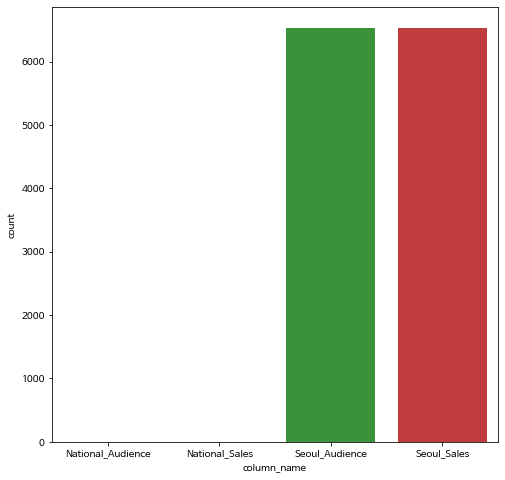

,column_name,count
0,National_Audience,3
1,National_Sales,3
2,Seoul_Audience,6536
3,Seoul_Sales,6536


In [375]:
test = []
columns_0_count  = pd.DataFrame()
columns_0_count['column_name'] = num_columns

print("0 values")
for i in num_columns:
    print(i, ':' ,Counter(data[i])[0])
    test.append(Counter(data[i])[0])
    
columns_0_count['count'] = test

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=columns_0_count['column_name'], y=columns_0_count['count'])
plt.show()
columns_0_count

In [393]:
data[data.duplicated(['Movie_Name', 'year','month','day']) == True]

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day


영화제목은 같은 영화가 2번 기입된 경우는 없습니다.

## 3. 시각화